# Markov switching model 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression
from sklearn.metrics import mean_squared_error

def markov_switching_model(data, k_regimes=2):
    # Set the frequency of the data
    frequency = str(input("Enter the frequency of the data (T, H, D, W, M , Y): "))
    index_freq = frequency.upper()
    index = pd.date_range(start=data.index[0], periods=len(data), freq=index_freq)
    
    # Create the Markov switching model
    model = MarkovRegression(data, k_regimes=k_regimes, trend="nc", switching_variance=True)
    results = model.fit()

    # Print model summary
    print_result = input("Do you want the model summary to be shown? (y/n): ")
    if print_result.lower() == "y":
        print(results.summary())
    else:
        pass

    # Plot the estimated states
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(index, results.smoothed_marginal_probabilities[0], label="Regime 0")
    ax.plot(index, results.smoothed_marginal_probabilities[1], label="Regime 1")
    ax.legend(loc="upper left")


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import requests
from io import BytesIO

In [4]:
import yfinance as yf
BTC = yf.download("BTC-USD")
price = BTC["Close"]
price2 = price[price.index>='2021-01-01']

R = price.pct_change().dropna()
R

[*********************100%***********************]  1 of 1 completed


Date
2014-09-18   -0.071926
2014-09-19   -0.069843
2014-09-20    0.035735
2014-09-21   -0.024659
2014-09-22    0.008352
                ...   
2023-05-04   -0.005468
2023-05-05    0.023803
2023-05-06   -0.021323
2023-05-07   -0.015556
2023-05-08   -0.033063
Name: Close, Length: 3155, dtype: float64

In [6]:
model = sm.tsa.MarkovAutoregression(R, k_regimes=2, order=4, switching_ar=True)
result = model.fit()
result.summary()

F:\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                    Close   No. Observations:                 3151
Model:             MarkovAutoregression   Log Likelihood                5949.387
Date:                  Tue, 09 May 2023   AIC                         -11872.775
Time:                          01:05:42   BIC                         -11794.053
Sample:                      09-18-2014   HQIC                        -11844.530
                           - 05-08-2023                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0029      0.003     -1.071      0.284      -0.008       0.002
ar.L1          0.7312      0.093      7.856      0.000       0.549       0.914
ar.L2          0.3913      0.073      5.392      0.000       0.249       0.533
ar.L3          0.3256      0.079      4.104      0.000       0.170       0.481
ar.L4         -0.4481      0.098     -4.581      0.000      -0.640      -0.256
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0032      0.001      4.403      0.000       0.002       0.005
ar.L1         -0.1422      0.022     -6.498      0.000      -0.185      -0.099
ar.L2         -0.0650      0.024     -2.728      0.006      -0.112      -0.018
ar.L3         -0.0545      0.025     -2.194      0.028      -0.103      -0.006
ar.L4          0.0888      0.022      4.068      0.000       0.046       0.132
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0012   3.49e-05     33.367      0.000       0.001       0.001
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.0631      0.037      1.683      0.092      -0.010       0.137
p[1->0]        0.2108      0.046      4.614      0.000       0.121       0.300
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

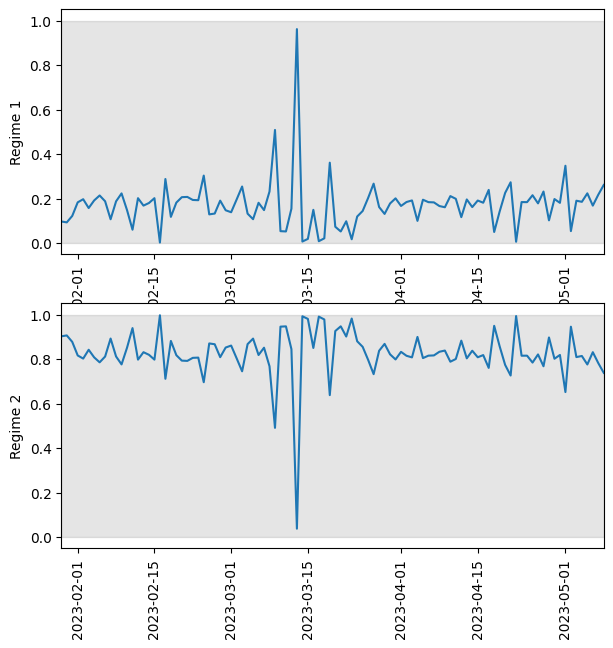

In [8]:
fig, axes = plt.subplots(2, figsize=(7,7))

ax = axes[0]
ax.plot(result.filtered_marginal_probabilities[0][-100:])
ax.fill_between(R.index[-100:], 0, 1, color='k', alpha=0.1)
ax.set_xlim(R.index[-100], R.index[-1])  # Set x-axis limits to the first and last index of the data
ax.set_ylabel('Regime 1')
ax.tick_params(axis='x', rotation=90)

# Add code to plot the second regime
ax = axes[1]
ax.plot(result.filtered_marginal_probabilities[1][-100:])
ax.fill_between(R.index[-100:], 0, 1, color='k', alpha=0.1)
ax.set_xlim(R.index[-100], R.index[-1])  # Set x-axis limits to the first and last index of the data
ax.set_ylabel('Regime 2')
ax.tick_params(axis='x', rotation=90)
plt.show()


Enter the frequency of the data (T, H, D, W, M , Y): D


F:\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\tsatools.py:821: FutureWarning: trend 'nc' has been renamed to 'n' after 0.14 is released. Use 'n' now to avoid this warning.
  warnings.warn(
F:\anaconda3\envs\MachineLearning\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Do you want the model summary to be shown? (y/n): y
                        Markov Switching Model Results                        
Dep. Variable:                  Close   No. Observations:                 3150
Model:               MarkovRegression   Log Likelihood              -32820.405
Date:                Tue, 02 May 2023   AIC                          65648.810
Time:                        21:58:05   BIC                          65673.031
Sample:                    09-17-2014   HQIC                         65657.501
                         - 05-02-2023                                         
Covariance Type:               approx                                         
                             Regime 0 parameters                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       3.36e+05    5.7e-15    5.9e+19      0.000    3.36e+05    3.36e+05


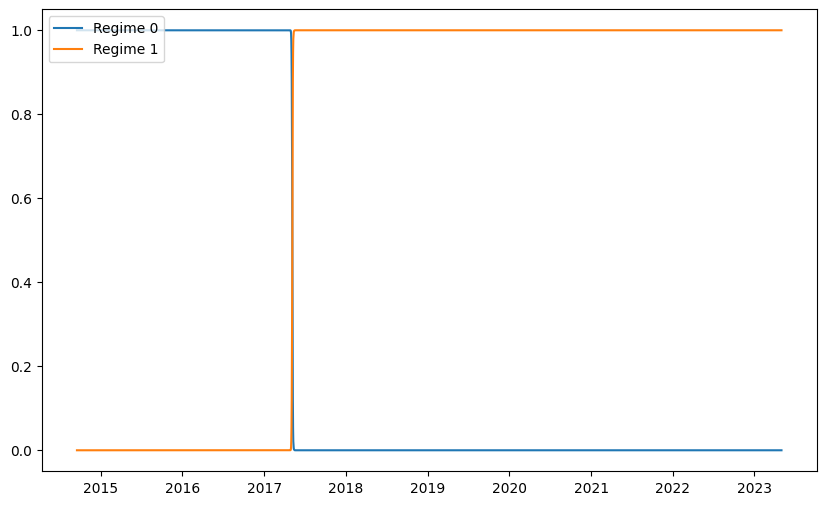

In [7]:
markov_switching_model(price, 2)